In [1]:
from tqdm import tqdm
import numpy as np

tqdm.monitor_interval = 0  # fix problems with sudden breaks in progress bar

import matplotlib.pyplot as plt
import visualization_functions as vf
from mesamodel import World

import networkx as nx

## Section 1: Show that severance costs affect how the network converges, but not the equilibrium state

### Hint
Start with 0 severance costs and show that the network converges and is pairwise stable.
Then use the resulting network `World.net` and initialise a new world with severance costs using the stable network as the initial network.

In [28]:
world = World(
    num_agents=10,
    cost=0.1,
    severance_cost=0,
    deletion_prob=0,
    mutual_create=True,
    mutual_delete=False,
    max_steps=200,
    update_type="best_choice",
)

In [29]:
np.random.seed(10)
world.run_model()
world.is_pairwise_stable()

True

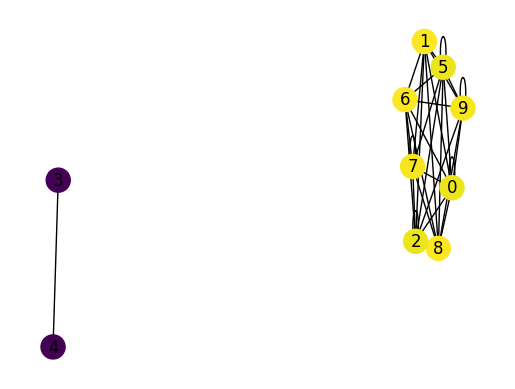

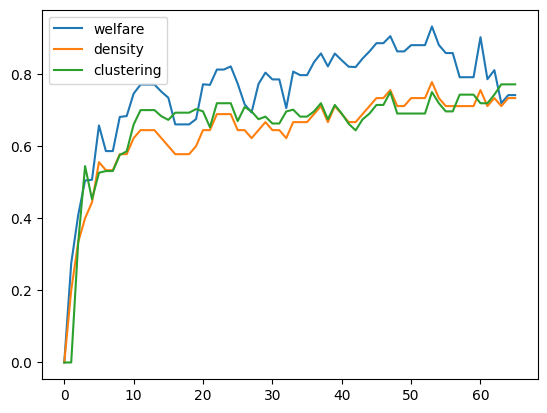

In [30]:
vf.plot_network(world)
plt.show()

vf.plot_evolution(world, show_activities=False)

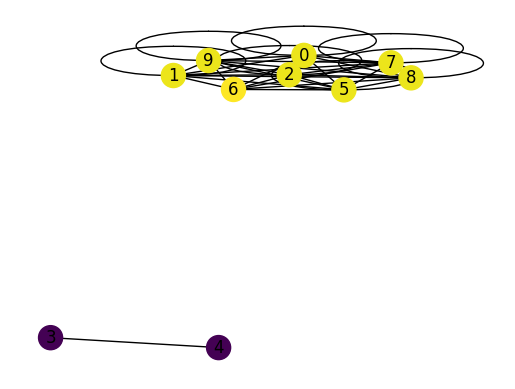

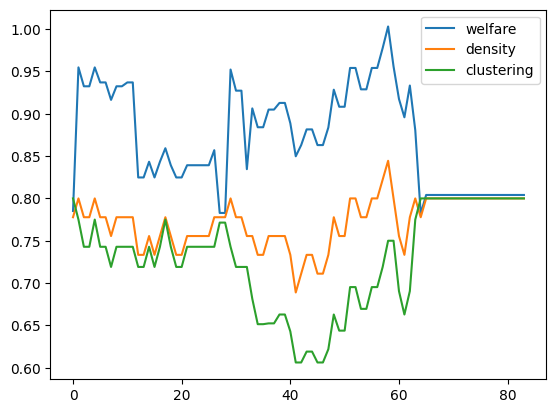

In [36]:
resulting_net = world.net

new_world = World(
    num_agents=10,
    cost=0.1,
    severance_cost=0.6,
    deletion_prob=0,
    mutual_create=True,
    mutual_delete=False,
    max_steps=200,
    update_type="best_choice",
)
new_world.net = resulting_net

# vf.plot_network(new_world) # Check that network looks the same as above

new_world.run_model()
new_world.is_pairwise_stable()

vf.plot_network(new_world)

plt.show()
vf.plot_evolution(new_world, show_activities=False)

## Section 2: Show differences in utility due to network position

Show that the position of an agent in the network affects their utility from a change, despite all agents in the same component having the same utiliy. 

### Hint
To do this, you will need to provide explicitly a network to the `World` class.
You can this as follows:

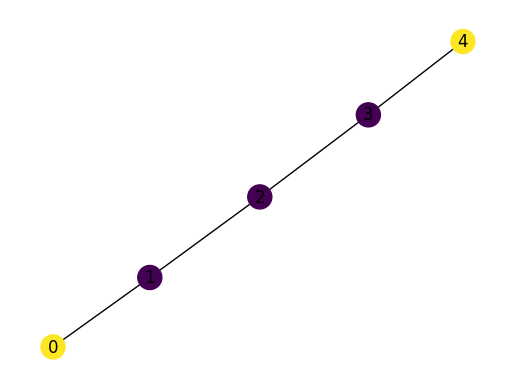

AW_0: 0.4330127018922193
1_util_0 1.2320508075688772


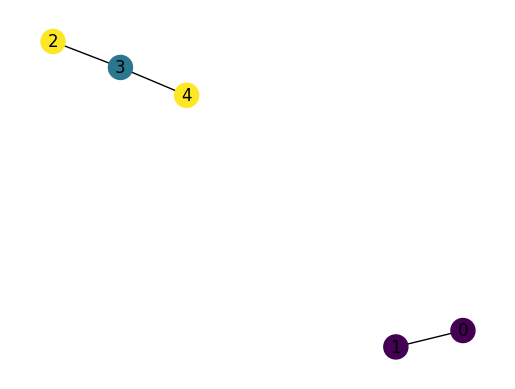

AW_1: 0.31213203435596426
1_util_1 0.75
Benefit from removing edge for agent 1: -0.4820508075688772
Benefit from removing edge for agent 2: -0.06783724519578205


In [5]:
example_world = World(
    num_agents=5,
    cost=0.25,
    severance_cost=0.1,
    deletion_prob=0,
    mutual_create=True,
    mutual_delete=False,
    max_steps=100,
    update_type="best_choice",
)

# create a network with 5 agents in a chain
example_world.net.add_edge(0, 1)
example_world.net.add_edge(1, 2)
example_world.net.add_edge(2, 3)
example_world.net.add_edge(3, 4)

vf.plot_network(example_world)
print("AW_0:", example_world.aggregate_welfare())

uid=1
uid_2 = 2
agent_1 = [agent for agent in example_world.schedule.agents if agent.unique_id==uid][0]
agent_2 = [agent for agent in example_world.schedule.agents if agent.unique_id==uid_2][0]
util_1_0 = agent_1.utility(agent_1.subgraph())
util_2_0 = agent_2.utility(agent_2.subgraph())

print(str(uid)+"_util_"+"0",util_1_0)

example_world.net.remove_edge(1,2)
util_1_1 = agent_1.utility(agent_1.subgraph())
util_2_1 = agent_2.utility(agent_2.subgraph())
vf.plot_network(example_world)
print("AW_1:", example_world.aggregate_welfare())
print(str(uid)+"_util_"+"1",util_1_1)
benefit_1 = util_1_1-util_1_0
benefit_2 = util_2_1-util_2_0
print("Benefit from removing edge for agent 1:", benefit_1)
print("Benefit from removing edge for agent 2:", benefit_2)


**Question 1:** In this network, what is the benefit of agent 1 to deleting a link to agent 2? And what is the benefit of agent 2 to deleting a link to agent 1? Why the difference? (Note agents are 0-indexed)

**Answer 1:**

agent 1 has a larger negative benefit because it loses a larger subnetwork (3 nodes) while agent 2 only loses 2 nodes and therefore loses less benefit

**Question 2:** Define a network where the benefit of deleting a link is the same for all agents.

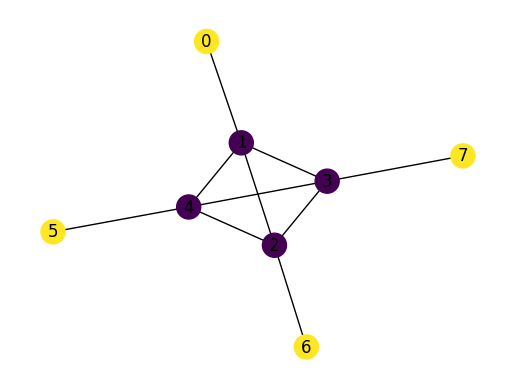

u_2: 2.302775637731994
u_3: 2.302775637731994
AW_0 0.47182509110457055


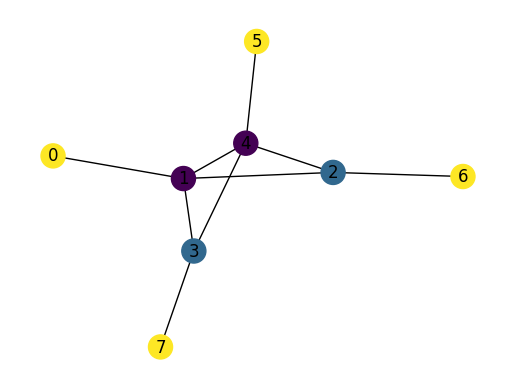

u_2: 2.155703544217742
u_3: 2.155703544217742
AW_1: 0.4151005063168203
[-0.397072093514252, -0.397072093514252, -0.147072093514252, -0.147072093514252, -0.397072093514252, -0.397072093514252, -0.397072093514252, -0.397072093514252]


In [14]:
example_world_2 = World(
    num_agents=8,
    cost=0.25,
    severance_cost=0.1,
    deletion_prob=0,
    mutual_create=True,
    mutual_delete=False,
    max_steps=100,
    update_type="best_choice",
)

example_world_2.net.add_edge(0, 1)
example_world_2.net.add_edge(1, 2)
example_world_2.net.add_edge(4, 5)
example_world_2.net.add_edge(2, 3)
example_world_2.net.add_edge(3, 4)
example_world_2.net.add_edge(3, 7)
example_world_2.net.add_edge(2, 6)
example_world_2.net.add_edge(2, 4)
example_world_2.net.add_edge(1, 3)
example_world_2.net.add_edge(1, 4)

vf.plot_network(example_world_2)
unique_id_2 = 2
unique_id_3 = 3
a_2 = [agent for agent in example_world_2.schedule.agents if agent.unique_id==unique_id_2][0]
a_3 = [agent for agent in example_world_2.schedule.agents if agent.unique_id==unique_id_3][0]

u_2_0 = a_2.utility(a_2.subgraph())
u_3_0 = a_3.utility(a_3.subgraph())
print("u_2:", u_2_0)
print("u_3:", u_3_0)
print("AW_0", example_world_2.aggregate_welfare())

u_0 = [agent.utility(agent.subgraph()) for agent in example_world_2.schedule.agents]

example_world_2.net.remove_edge(2, 3)
vf.plot_network(example_world_2)
u_2_1 = a_2.utility(a_2.subgraph())
u_3_1 = a_3.utility(a_3.subgraph())
print("u_2:", u_2_1)
print("u_3:", u_3_1)
print("AW_1:", example_world_2.aggregate_welfare())

u_1 = [agent.utility(agent.subgraph()) for agent in example_world_2.schedule.agents]

benefits = []
for i in range(len(u_1)):
    benefits.append(u_1[i]-u_0[i])

print(benefits)


**I did not manage to solve this task**

If I understood the question correctly, that all nodes in the network should have the same delta of utilities. *It would have to be a redundant edge that does not change any of the utils?*

**Question 3:** Define a network where the benefit of deleting a link is the different for all agents (different from the network in Question 1). What is the fundamental reason for this difference?

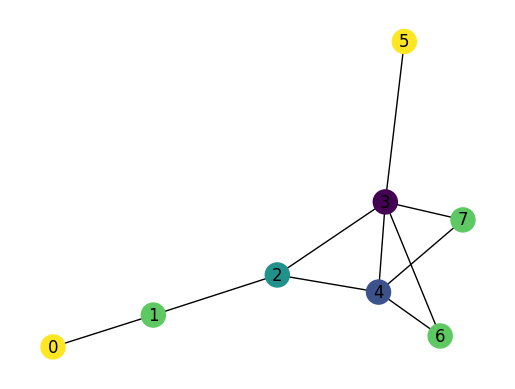

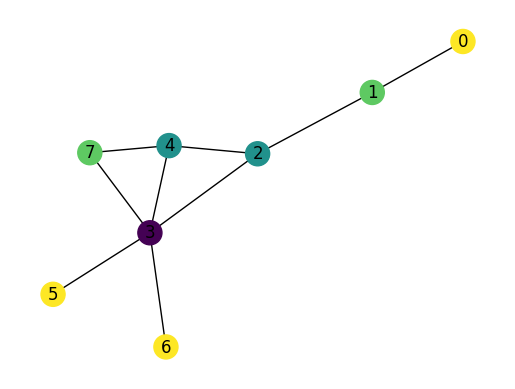

[-0.26965087720092384, -0.26965087720092384, -0.26965087720092384, -0.26965087720092384, -0.019650877200923844, -0.26965087720092384, -0.019650877200923844, -0.26965087720092384]


In [27]:
example_world_3 = World(
    num_agents=8,
    cost=0.25,
    severance_cost=0.1,
    deletion_prob=0,
    mutual_create=True,
    mutual_delete=False,
    max_steps=100,
    update_type="best_choice",
)

example_world_3.net.add_edge(0, 1)
example_world_3.net.add_edge(1, 2)
example_world_3.net.add_edge(2, 3)
example_world_3.net.add_edge(4, 2)
example_world_3.net.add_edge(3, 4)
example_world_3.net.add_edge(3, 5)
example_world_3.net.add_edge(3, 6)
example_world_3.net.add_edge(3, 7)
example_world_3.net.add_edge(6, 4)
example_world_3.net.add_edge(4, 7)

vf.plot_network(example_world_3)

ut_0 = [agent.utility(agent.subgraph()) for agent in example_world_3.schedule.agents]

example_world_3.net.remove_edge(4,6)

vf.plot_network(example_world_3)
ut_1 = [agent.utility(agent.subgraph()) for agent in example_world_3.schedule.agents]


b = []
for i in range(len(ut_1)):
    b.append(ut_1[i]-ut_0[i])

print(b)

Here I tried giving nodes unique degrees, but if I remember correctly from an algorithms course this is impossible. 

Again, a bit clueless on how to solve this